# Лабораторна робота №8
# Тема: Структура даних граф. Алгоритми на графах.
# Мета: Засвоїти представлення структури даних граф та основні алгоритми роботи з ними засобами Python.

# Створення графа на Python + Реалізація класів Vertex та Graph

In [1]:
class Vertex:
    def __init__(self, key):
        self.id = key
        self.connected_to = {}

    def add_neighbor(self, nbr, weight=0):
        self.connected_to[nbr] = weight

    def get_connections(self):
        return self.connected_to.keys()

    def get_id(self):
        return self.id

    def get_weight(self, nbr):
        return self.connected_to[nbr]

# Клас для графа
class Graph:
    def __init__(self):
        self.vert_list = {}
        self.num_vertices = 0

    def add_vertex(self, key):
        self.num_vertices += 1
        new_vertex = Vertex(key)
        self.vert_list[key] = new_vertex
        return new_vertex

    def get_vertex(self, n):
        return self.vert_list.get(n)

    def add_edge(self, f, t, cost=0):
        if f not in self.vert_list:
            self.add_vertex(f)
        if t not in self.vert_list:
            self.add_vertex(t)
        self.vert_list[f].add_neighbor(self.vert_list[t], cost)

    def get_vertices(self):
        return list(self.vert_list.keys())

    def __iter__(self):
        return iter(self.vert_list.values())

# Додавання вершин і ребер

In [2]:
g = Graph()
g.add_edge('A', 'B', 1)
g.add_edge('A', 'C', 2)
g.add_edge('B', 'C', 3)
g.add_edge('C', 'D', 4)
g.add_edge('D', 'E', 5)

# Списки суміжності

In [4]:
for v in g:
    print(f"Vertex {v.get_id()} connected to:", [x.get_id() for x in v.get_connections()])

Vertex A connected to: ['B', 'C']
Vertex B connected to: ['C']
Vertex C connected to: ['D']
Vertex D connected to: ['E']
Vertex E connected to: []


# Візуалізація графа (звичайного та зваженого) за допомогою NetworkX

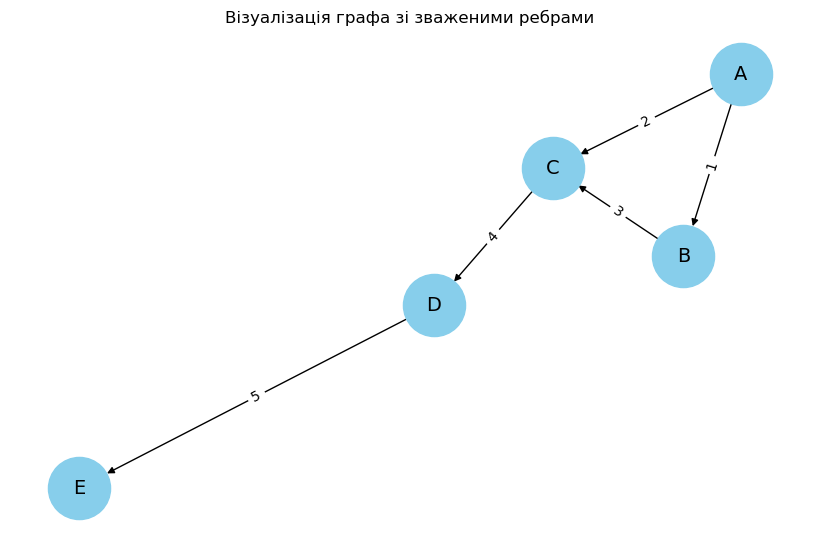

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import heapq
# Створимо граф через NetworkX для візуалізації
G_nx = nx.DiGraph()

for v in g:
    for nbr in v.get_connections():
        G_nx.add_edge(v.get_id(), nbr.get_id(), weight=v.get_weight(nbr))

pos = nx.spring_layout(G_nx)
weights = nx.get_edge_attributes(G_nx, 'weight')

plt.figure(figsize=(8, 5))
nx.draw(G_nx, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=14)
nx.draw_networkx_edge_labels(G_nx, pos, edge_labels=weights)
plt.title("Візуалізація графа зі зваженими ребрами")
plt.show()


# Пошук у глибину

In [6]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start, end=' ')
    for neighbor in graph.get_vertex(start).get_connections():
        if neighbor.get_id() not in visited:
            dfs(graph, neighbor.get_id(), visited)

print("DFS:")
dfs(g, 'A')

DFS:
A B C D E 

# Пошук у ширину 

In [7]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    visited.add(start)

    while queue:
        vertex = queue.popleft()
        print(vertex, end=' ')
        for neighbor in graph.get_vertex(vertex).get_connections():
            nid = neighbor.get_id()
            if nid not in visited:
                visited.add(nid)
                queue.append(nid)

print("\nBFS:")
bfs(g, 'A')


BFS:
A B C D E 

# Алгоритм Дейкстри

In [15]:
import heapq

def dijkstra(graph, start):
    distances = {v: float('inf') for v in graph.get_vertices()}
    distances[start] = 0
    pq = [(0, start)]

    while pq:
        current_distance, current_vertex = heapq.heappop(pq)
        for neighbor in graph.get_vertex(current_vertex).get_connections():
            weight = graph.get_vertex(current_vertex).get_weight(neighbor)
            distance = current_distance + weight
            if distance < distances[neighbor.get_id()]:
                distances[neighbor.get_id()] = distance
                heapq.heappush(pq, (distance, neighbor.get_id()))
    return distances

print("\nDijkstra:")
print(dijkstra(g, 'A'))



Dijkstra:
{'A': 0, 'B': 1, 'C': 2, 'D': 6, 'E': 11}


# Алгоритм Беллмана-Форда

In [9]:
def bellman_ford(graph, start):
    distance = {v: float('inf') for v in graph.get_vertices()}
    distance[start] = 0

    for _ in range(len(graph.get_vertices()) - 1):
        for v in graph:
            for nbr in v.get_connections():
                u = v.get_id()
                v_ = nbr.get_id()
                w = v.get_weight(nbr)
                if distance[u] + w < distance[v_]:
                    distance[v_] = distance[u] + w

    # Перевірка на негативні цикли
    for v in graph:
        for nbr in v.get_connections():
            u = v.get_id()
            v_ = nbr.get_id()
            w = v.get_weight(nbr)
            if distance[u] + w < distance[v_]:
                raise ValueError("Граф має цикл з від’ємною вагою")

    return distance

print("\nBellman-Ford:")
print(bellman_ford(g, 'A'))


Bellman-Ford:
{'A': 0, 'B': 1, 'C': 2, 'D': 6, 'E': 11}


# Використання NetworkX окремо для побудови графа

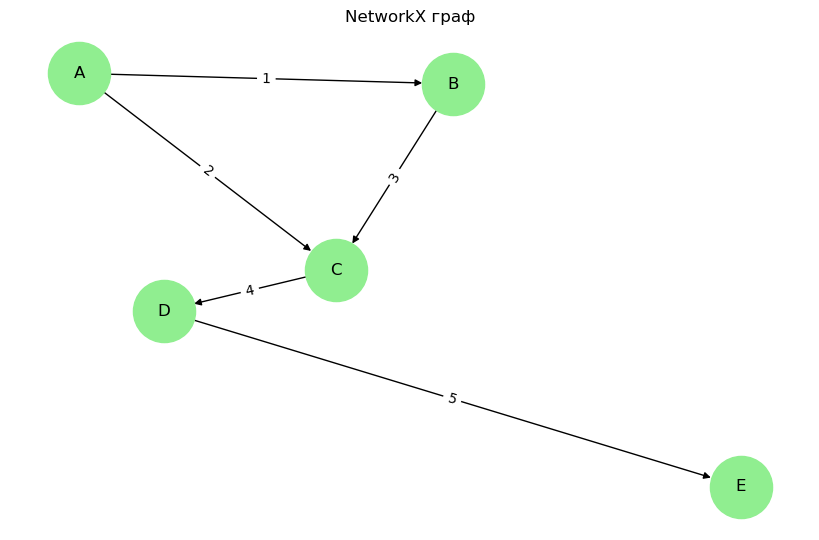

In [10]:
G_nx2 = nx.DiGraph()
G_nx2.add_weighted_edges_from([
    ('A', 'B', 1),
    ('A', 'C', 2),
    ('B', 'C', 3),
    ('C', 'D', 4),
    ('D', 'E', 5)
])

pos = nx.spring_layout(G_nx2)
plt.figure(figsize=(8, 5))
nx.draw(G_nx2, pos, with_labels=True, node_color='lightgreen', node_size=2000)
nx.draw_networkx_edge_labels(G_nx2, pos, edge_labels={(u, v): d['weight'] for u, v, d in G_nx2.edges(data=True)})
plt.title("NetworkX граф")
plt.show()

# Контрольні запитання

# 1. Граф у теорії графів
* Граф - множина вершин, з'єднаних ребрами: G = (V, E).
* Приклади застосування:
* Соціальні мережі (друзі)
* Дорожні карти (міста-дороги)
* Інтернет (сайти-посилання)
* Комп'ютерні мережі
* Родинні дерева
# 2. Види графів
* Основні типи:
* Орієнтовані/неорієнтовані
* Зважені/незважені
* Зв'язні/незв'язні
* Циклічні/ациклічні
* Орієнтований vs неорієнтований:
* Орієнтований: ребра мають напрямок (A→B ≠ B→A)
* Неорієнтований: ребра двосторонні (A-B = B-A)
# 3. Представлення графів у пам'яті
* Матриця суміжності:
* 2D масив, adj[i][j] = 1 якщо є ребро
* Простий доступ O(1), багато пам'яті O(V²)
* Список суміжності:
* Масив списків сусідів для кожної вершини
* Економія пам'яті O(V+E), швидке додавання
# 4. Пошук у ширину (BFS)
* Принцип: відвідуємо всі сусідні вершини перед переходом глибше. Використовує чергу.
* Застосування:
* Найкоротший шлях (незважені графи)
* Рівні в дереві
* Перевірка зв'язності
* Соціальні мережі (ступінь розділення)
# 5. Пошук у глибину (DFS)
* Принцип: йдемо максимально глибоко перед поверненням. Використовує стек.
* Відмінності від BFS:
* DFS: глибина спочатку, стек
* BFS: ширина спочатку, черга
*Застосування DFS:
* Топологічне сортування
* Пошук циклів
* Компоненти зв'язності
* Лабіринти
# 6. Алгоритм Дейкстри
* Принцип: жадібний алгоритм для знаходження найкоротших шляхів від однієї вершини до всіх інших.
* Як працює:
* Ініціалізація відстаней (∞ для всіх, крім стартової)
* Вибір вершини з мінімальною відстанню
* Оновлення відстаней до сусідів
* Повторення до обробки всіх вершин
* Умови застосування:
* Неорієнтовані або орієнтовані графи
* Обов'язково: невід'ємні ваги ребер
* Зв'язний граф
* Складність: O((V+E)log V) з пріоритетною чергою